In [78]:
import numpy as np
import pandas as pd
import scipy

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [22]:
fitResults = pd.DataFrame(pd.read_pickle('../data/snFits.p')).transpose()

In [137]:
1.5**2

2.25

In [147]:
fitResults.columns

Index([u'c', u'hostebv', u'hostr_v', u'inputParams', u'mu', u'mu_var',
       u'mwebv', u'mwr_v', u't0', u'x0', u'x1', u'z', u'mu_err'],
      dtype='object')

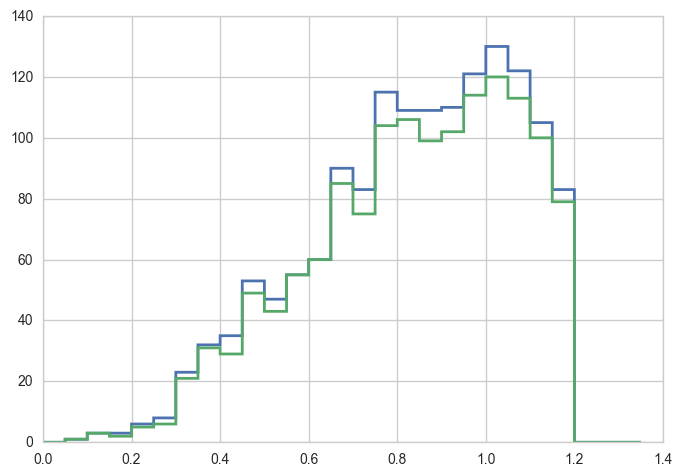

In [148]:
fig, ax = plt.subplots()
_ = ax.hist(fitResults.dropna().z.values, histtype='step', bins=np.arange(0., 1.4, 0.05), lw=2)
_ = ax.hist(fitResults.dropna().query('mu_var < 2.25').z, histtype='step',
            bins=np.arange(0., 1.4, 0.05), lw=2)

In [97]:
fitResults[['z', 'mu', 'mu_var']] = fitResults[['z', 'mu', 'mu_var']].astype(np.float)
fitResults['mu_err'] = fitResults.mu_var.apply(np.sqrt)
fitResults['mu'] += 29.7558
df = fitResults[['z', 'mu', 'mu_err']].query('mu_err < 1.5')

In [98]:
df.head()

,z,mu,mu_err
10005,0.968958,73.960111,0.503012
10024,0.861278,74.175364,0.526293
10034,0.820012,73.804557,0.548847
10059,1.040996,74.819783,0.732858
10087,0.981252,73.883489,0.627543


(-5.0, 100.0)

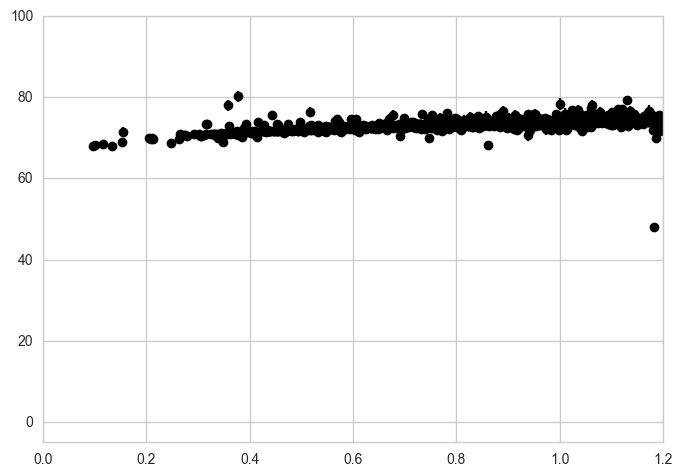

In [99]:
fig, ax = plt.subplots()
ax.errorbar(df.z, df.mu, yerr=df.mu_err, fmt='ko')
ax.set_ylim(-5., 100.)

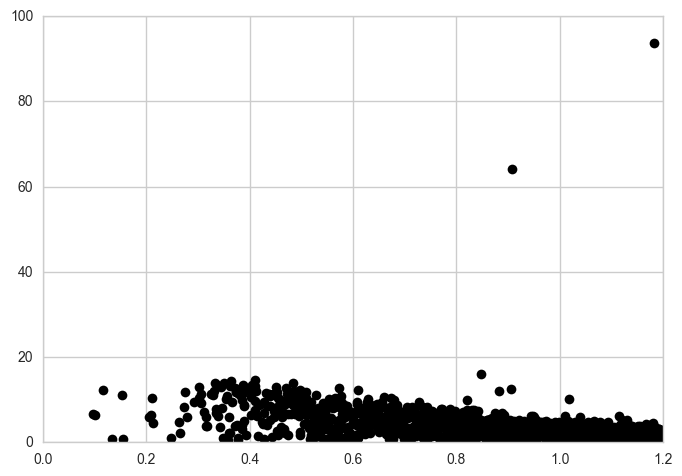

In [100]:
fig, ax = plt.subplots()
df['eff_mu_err']  = np.sqrt(df.mu_err**2 + 0.1**2) 
ax.plot(df.z, df.eff_mu_err**(-2),'ko')

In [101]:
df['binIndex'] = df.z //0.1

In [102]:
grouped = df.groupby('binIndex')

In [103]:
newtable = grouped.agg()

TypeError: aggregate() takes at least 2 arguments (1 given)

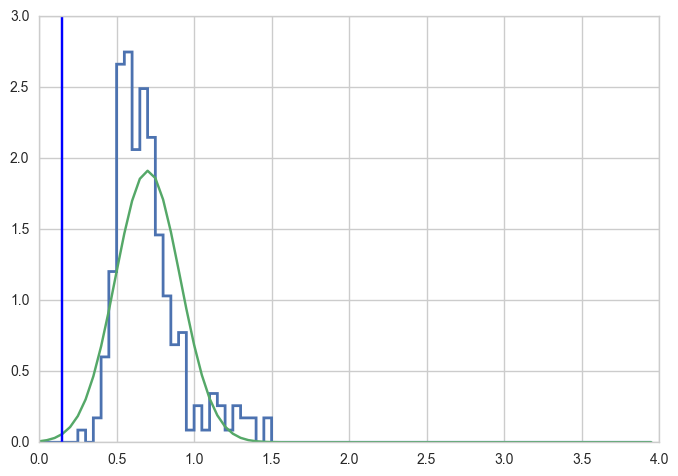

In [107]:
fig, ax = plt.subplots()
vals = np.arange(0., 4., 0.05)
#thresh = 1.50
grouped.get_group(10).mu_err.hist(bins=vals, histtype='step', lw=2, ax=ax, normed=1)
m = grouped.get_group(10).mu_err.mean()
s = grouped.get_group(10).mu_err.std()
ax.plot(vals, scipy.stats.norm.pdf(vals, m, s))
ax.axvline(0.15)

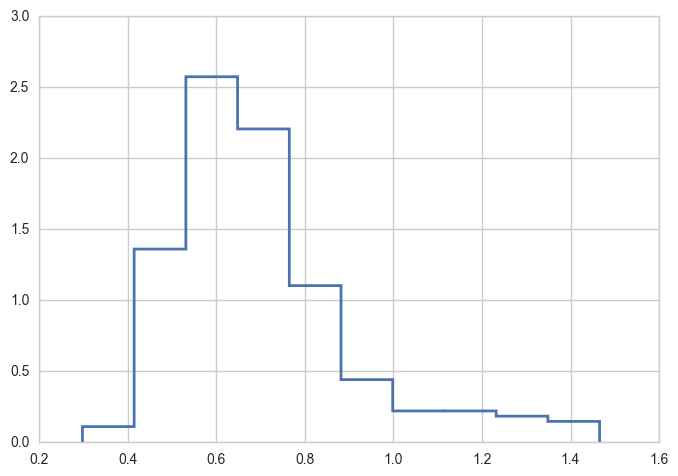

In [105]:
grouped.get_group(10).mu_err.hist(histtype='step', lw=2,  normed=1)

In [106]:
x = np.random.uniform(size=100)
np.mean(x)

0.49848211966495048

In [115]:
x[[x > .5]]

array([ 0.89225505,  0.72589895,  0.61077439,  0.53851155,  0.80162991,
        0.94800473,  0.73418903,  0.90955367,  0.8355374 ,  0.90580072,
        0.54639376,  0.8929976 ,  0.90103991,  0.79048064,  0.92281019,
        0.75904057,  0.73961288,  0.55893867,  0.87708301,  0.94765174,
        0.6096643 ,  0.99225511,  0.85001206,  0.77581993,  0.59390156,
        0.96693297,  0.54857168,  0.99811029,  0.93903493,  0.69044033,
        0.87875709,  0.65385454,  0.67930871,  0.50007744,  0.83506021,
        0.57537595,  0.70676624,  0.75391403,  0.6987813 ,  0.73351539,
        0.50706712,  0.98156949,  0.50254658,  0.56037214,  0.62769137,
        0.63801157,  0.57604311,  0.50640514,  0.68448033,  0.53971395,
        0.9567777 ,  0.51806642,  0.54431154])

In [116]:
def clipped_mean(mu_err, outlier_thresh):
    return np.mean(mu_err[mu_err < outlier_thresh])

In [124]:
grouped.get_group(10).mu_err.mean()

0.70117617693592393

In [125]:
grouped.get_group(10).mu_err.std()

0.20875753414209755

In [121]:
grouped.agg(dict(mu_err=[np.mean, np.std]))

mu_err          
              mean       std
binIndex                    
0.0       0.373468       NaN
1.0       0.639079  0.453628
2.0       0.449529  0.205451
3.0       0.418621  0.261837
4.0       0.382548  0.165145
5.0       0.480845  0.219671
6.0       0.462202  0.166019
7.0       0.533473  0.190570
8.0       0.575415  0.191252
9.0       0.648154  0.212502
10.0      0.701176  0.208758
11.0      0.716599  0.198387

In [127]:
df.head()

,z,mu,mu_err,eff_mu_err,binIndex
10005,0.968958,73.960111,0.503012,0.512856,9.0
10024,0.861278,74.175364,0.526293,0.535709,8.0
10034,0.820012,73.804557,0.548847,0.557883,8.0
10059,1.040996,74.819783,0.732858,0.739649,10.0
10087,0.981252,73.883489,0.627543,0.635461,9.0


In [132]:
df['mu_xxx'] = df['mu_err'].apply(np.sqrt)

In [133]:
df.head()

,z,mu,mu_err,eff_mu_err,binIndex,mu_xxx
10005,0.968958,73.960111,0.503012,0.512856,9.0,0.709233
10024,0.861278,74.175364,0.526293,0.535709,8.0,0.725461
10034,0.820012,73.804557,0.548847,0.557883,8.0,0.740842
10059,1.040996,74.819783,0.732858,0.739649,10.0,0.856071
10087,0.981252,73.883489,0.627543,0.635461,9.0,0.792176
